In [1]:
import numpy as np
import math
import sys
import json
import pandas as pd
import time
import matplotlib.pyplot as plt
import random
import itertools

In [2]:
from javaconnector import KronosModelConnector

kronos = KronosModelConnector()

In [3]:
def dataset2list(dataSet):
    List=[]
    for idx in range(0, dataSet.size()):
        List.append(dataSet.getY(idx))
    return List

In [4]:
#Input all variables into workforce model and output results
def policyOut(kronos,rec_policy):
    for i in range(0, int(num_quarters)):
        kronos.conf.add_input_rate_schedule(i, "Sailor", rec_policy[1][i] )
        kronos.conf.add_input_rate_schedule(i, "Officer",rec_policy[0][i] )
    
    kronos.init_model()
    kronos.conf.set_slot_mode("ZERO_AVAILABLILTY")
 
    kronos.main.write_output = False;

    kronos.run_model()
    
    sailors = kronos.main.get_workforce( "Sailor" )
    officers = kronos.main.get_workforce( "Officer" )
    
    return  dataset2list(kronos.main.crewable_platformsDS), dataset2list(kronos.main.deployed_platformsDS) , dataset2list(kronos.main.docked_platformsDS) , dataset2list(sailors.rank_1_gapDS), dataset2list(sailors.rank_2_gapDS), dataset2list(sailors.rank_3_gapDS), dataset2list(sailors.rank_4_gapDS),dataset2list(officers.rank_1_gapDS), dataset2list(officers.rank_2_gapDS), dataset2list(officers.rank_3_gapDS), dataset2list(officers.rank_4_gapDS)

In [5]:
#Calculate Workforce Cost and Unavailability Cost
def workforceCost(s1,s2,s3,s4,o1,o2,o3,o4,docked):
    costS1=np.sum([(x > 0)*x*1.04671 for x in s1]) #104671
    costS2=np.sum([(x > 0)*x*1.10318 for x in s2]) #110318)
    costS3=np.sum([(x > 0)*x*1.19365 for x in s3]) #119365)
    costS4=np.sum([(x > 0)*x*1.29734 for x in s4]) #129734)

    costO1=np.sum([(x > 0)*x* 1.15418 for x in o1]) #115418)
    costO2=np.sum([(x > 0)*x* 1.33507 for x in o2]) #133507)
    costO3=np.sum([(x > 0)*x* 1.53765 for x in o3]) #153765)
    costO4=np.sum([(x > 0)*x* 1.78864 for x in o4]) #178864)
    dockCost=np.sum([x* 500 for x in docked]) #5000000)
    total= costS1+costS2+costS3+costS4+costO1+costO2+costO3+costO4+dockCost
    return total

In [6]:
#Generate Plots for each Scenario
def plots(a,b,c,d,e,f,g,h,i1,j,k):
    fig1 = plt.figure()
    rect = fig1.patch
    rect.set_facecolor("white")
    plt.plot(a, label="Crewable")
    plt.plot(b,label='Deployed')
    plt.plot(c,label='Docked')
    plt.plot((np.add(b,c)),label='Total Fleet size')
    plt.legend()
    plt.xlabel("Time (Quarters)")
    plt.ylabel("Fleet Size")
    plt.ylim([0,18])
    filename='RobustRecAvab'
    i = 0
    while True:
        i += 1
        newname = '{}{:d}.png'.format(filename, i)
        if os.path.exists(newname):
            continue
        plt.savefig(newname)
        break
    #['Crewable','deployed','docked'])
    fig2 = plt.figure()
    rect = fig2.patch
    rect.set_facecolor("white")
    plt.plot(d,label='AB ETSM')
    plt.plot(e,label='LS ETSM')
    plt.plot(f,label='PO ETSM')
    plt.plot(g,label='CPO ETSM')
    plt.plot(h,label='SBLT MWOSM')
    plt.plot(i1,label='LEUT MWOSM')
    plt.plot(j,label='LCDR MWOSM')
    plt.plot(k,label='CMDR MWOSM')
    plt.legend()
    plt.xlabel("Time (Quarters)")
    plt.ylabel("Surplus")
    plt.ylim([-50,600])
    filename='RobustRecSurplus'
    i = 0
    while True:
        i += 1
        newname = '{}{:d}.png'.format(filename, i)
        if os.path.exists(newname):
            continue
        plt.savefig(newname)
        break
    plt.show()
    return

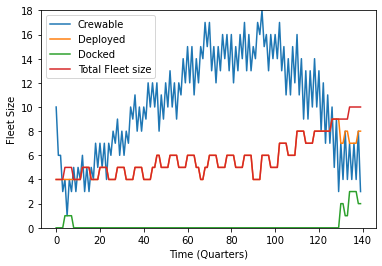

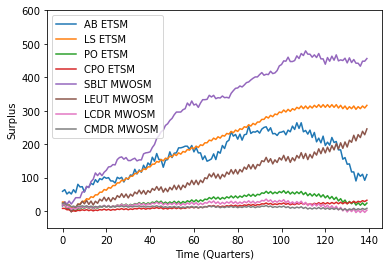

151978.77700568896
0.9680589680589681


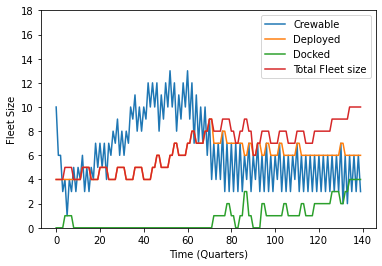

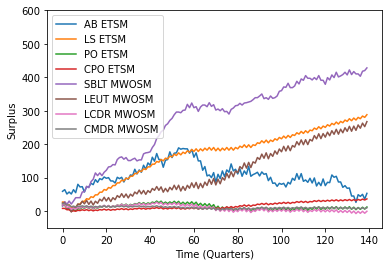

176220.55643608834
0.8731182795698924


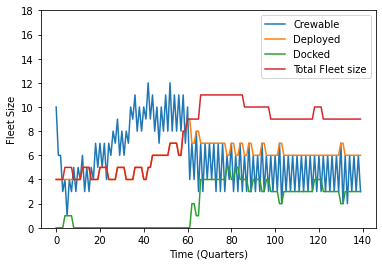

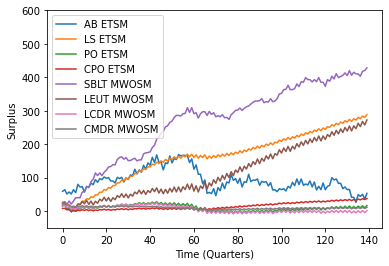

243607.55257772666
0.7551020408163265


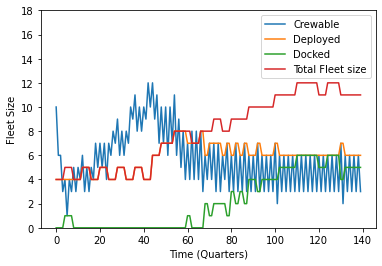

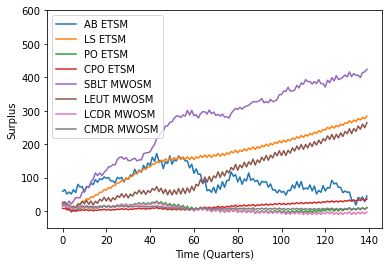

262231.66151783004
0.7280858676207513


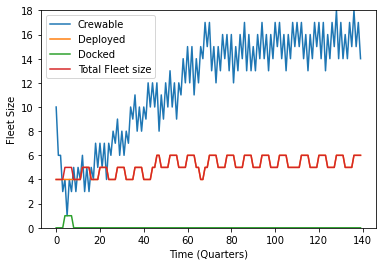

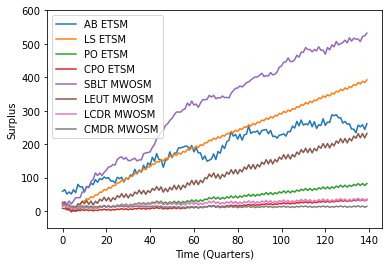

149682.507173664
0.9944444444444445


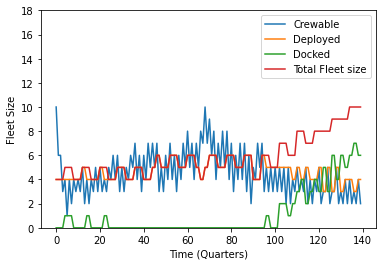

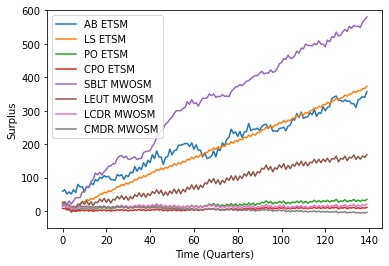

214404.9548250583
0.8058968058968059


In [7]:
#Main
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import datetime
import os
cv1=[19,13,0,10,1,9,18,0,6,17,9,16,6,18,17,19,0,8,0,10,16,10,11,6, 
7,16,14,2,3,5,1,0,12,3,0,3,10,18,13,1,10,13,17,18,18,12,17,14,
15,10,16,11,20,0,12,7,13,17,2,14,0,3,2,13,20,0,9,12,5,5,2,3,
11,6,5,1,8,14,20,7,13,6,7,6,17,2,18,5,16,0,15,6,0,3,11,10,
5,2,17,14,14,11,13,12,1,0,15,14,4,15,10,14,6,0,5,7,6,12,0,0,
0,20,5,15,4,16,0,3,16,7,4,15,0,9,7,0,5,15,14,8]
     
cv2=[24,5,3,6,14,13,7,25,4,1,0,16,19,11,16,15,8,11,13,8,16,2,10,0,
10,17,12,4,6,12,16,13,14,19,2,12,13,21,8,19,9,24,4,23,2,0,1,21,
22,23,3,13,25,15,24,2,23,0,11,11,5,13,8,0,0,11,0,3,24,15,7,24,
19,23,11,20,25,25,11,5,10,15,2,16,22,24,2,5,23,4,9,12,21,2,11,10,
6,1,14,9,21,3,17,14,23,17,14,20,7,17,5,4,21,12,6,15,0,11,18,20,
4,10,23,23,17,3,11,0,8,5,16,1,4,0,9,23,19,6,10,17]

Rec_Policy=[cv1,cv2]
Rec_Policy2=[[3,14,1,19,1,0,13,14,15,9,10,8,6,16,15,8,20,7,3,6,7,5,4,1
,18,0,14,19,6,18,4,11,10,1,0,0,13,4,9,20,8,3,12,13,20,0,9,3
,1,17,11,19,16,16,12,0,2,6,15,19,5,5,10,4,6,4,11,7,17,6,9,0
,15,8,11,0,14,6,8,0,20,11,2,9,8,2,6,7,10,18,5,10,3,16,3,0
,0,9,6,11,10,0,15,13,3,8,15,17,17,16,15,11,3,0,0,12,15,16,20,8
,2,6,20,17,16,10,5,0,8,12,2,11,10,4,8,6,7,14,14,14]
,[12,5,8,21,19,7,0,8,5,18,0,19,6,8,19,19,12,0,0,12,2,6,22,15
,13,21,14,18,1,20,3,6,8,6,11,6,5,9,6,2,21,3,9,11,19,17,4,15
,14,19,0,10,23,0,3,18,12,6,12,9,10,25,12,17,0,11,14,14,3,17,19,25
,4,20,13,1,23,23,24,23,25,17,9,1,25,3,16,2,15,17,9,4,11,16,0,2
,5,7,18,25,0,15,11,5,6,6,0,6,20,2,20,20,18,2,7,18,0,8,5,14
,10,9,25,3,25,7,10,0,0,2,7,25,20,21,4,13,8,8,22,4]]

Rec_Policy3=[[17, 11, 15,  9,  9,  3, 20, 15, 16,  6,  8,  5,  0,  4, 11,  2,  8,
       11,  6, 18, 10, 14, 11, 19, 18,  3,  2, 15, 11,  3, 10,  9, 19,  4,
        8, 12,  1, 18, 16, 13, 10,  2,  7,  1, 12,  0, 18,  6,  0,  3, 16,
       12, 13,  3, 18,  9, 14, 15, 17,  8,  9,  3,  5,  1,  5, 12, 20, 18,
        9,  8, 17,  3,  0,  2, 15,  5,  4,  4, 20,  0,  5,  3, 10,  7,  2,
       15, 15,  1,  3, 19, 20, 13, 20, 14, 18,  7, 16, 10,  1,  4,  5,  0,
       10, 10,  3,  1, 15,  8, 20, 16, 11, 10, 11, 15, 13, 12, 14,  7, 11,
        7,  2, 15,  3,  7, 11,  7, 11, 10, 19, 14,  7,  6, 16, 19,  8, 10,
        5, 11, 14, 18], [10,  2, 11, 10,  0,  2, 10,  5, 16, 19, 19,  8, 19,  7, 17,  4, 19,
       11, 16,  0,  0,  9, 11,  5, 24, 15,  3, 17, 20, 16, 20, 12, 21, 20,
       17,  9,  0, 23, 22, 18, 14, 21, 22, 10,  1,  8, 21,  3,  9, 25, 10,
        2, 21, 25,  6, 18, 19,  1,  9,  8, 12, 23,  7,  0, 22,  7, 15, 18,
       13, 23, 20,  2, 13, 16, 15, 19,  0,  4,  2,  0,  0,  4,  3, 23, 14,
       23, 11, 14, 23,  2, 13, 12, 17,  2, 15,  4,  4,  0,  4,  8, 19,  0,
        8, 16,  8, 15, 22, 13,  8, 25, 20, 15, 12,  5, 17,  7,  9, 14, 22,
        2, 22,  7, 12,  7,  9, 21, 22,  5,  8, 13, 22, 14, 20,  8, 15, 16,
       23,  1, 24,  9]]

#Transition Plan 1
dirFile= "conf/Model-Config_ZA_TP1.xlsx"
kronos.load_config(dirFile)
num_quarters= kronos.conf.sim_length_months/3
kronos.conf.clear_input_rate_schedules()
a,b,c,d,e,f,g,h,i1,j,k=policyOut(kronos,Rec_Policy)
xt=np.mean(b)+np.mean(c)
plots(a,b,c,d,e,f,g,h,i1,j,k)
obj= workforceCost(d,e,f,g,h,i1,j,k,c)
print(obj)
print((1-(np.mean(c)/(xt))))

#Transition Plan 2
dirFile= "conf/Model-Config_ZA_TP2.xlsx"
kronos.load_config(dirFile)
num_quarters= kronos.conf.sim_length_months/3
kronos.conf.clear_input_rate_schedules()
a,b,c,d,e,f,g,h,i1,j,k=policyOut(kronos,Rec_Policy)
xt=np.mean(b)+np.mean(c)
plots(a,b,c,d,e,f,g,h,i1,j,k)
obj= workforceCost(d,e,f,g,h,i1,j,k,c)
print(obj)
print((1-(np.mean(c)/(xt))))

#Transition Plan 3
dirFile= "conf/Model-Config_ZA_TP3.xlsx"
kronos.load_config(dirFile)
num_quarters= kronos.conf.sim_length_months/3
kronos.conf.clear_input_rate_schedules()
a,b,c,d,e,f,g,h,i1,j,k=policyOut(kronos,Rec_Policy)
xt=np.mean(b)+np.mean(c)
plots(a,b,c,d,e,f,g,h,i1,j,k)
obj= workforceCost(d,e,f,g,h,i1,j,k,c)
print(obj)
print((1-(np.mean(c)/(xt))))

#Increase Fleet Size
dirFile= "conf/Model-Config_ZA_Scenario2.xlsx"
kronos.load_config(dirFile)
num_quarters= kronos.conf.sim_length_months/3
kronos.conf.clear_input_rate_schedules()
a,b,c,d,e,f,g,h,i1,j,k=policyOut(kronos,Rec_Policy)
xt=np.mean(b)+np.mean(c)
plots(a,b,c,d,e,f,g,h,i1,j,k)
obj= workforceCost(d,e,f,g,h,i1,j,k,c)
print(obj)
print((1-(np.mean(c)/(xt))))

#Stop 2040
dirFile= "conf/Model-Config_ZA_Scenario3.xlsx"
kronos.load_config(dirFile)
num_quarters= kronos.conf.sim_length_months/3
kronos.conf.clear_input_rate_schedules()
a,b,c,d,e,f,g,h,i1,j,k=policyOut(kronos,Rec_Policy)
xt=np.mean(b)+np.mean(c)
plots(a,b,c,d,e,f,g,h,i1,j,k)
obj= workforceCost(d,e,f,g,h,i1,j,k,c)
print(obj)
print((1-(np.mean(c)/(xt))))

#Double Separation
dirFile= "conf/Model-Config_ZA_Scenario4.xlsx"
kronos.load_config(dirFile)
num_quarters= kronos.conf.sim_length_months/3
kronos.conf.clear_input_rate_schedules()
a,b,c,d,e,f,g,h,i1,j,k=policyOut(kronos,Rec_Policy)
xt=np.mean(b)+np.mean(c)
plots(a,b,c,d,e,f,g,h,i1,j,k)
obj= workforceCost(d,e,f,g,h,i1,j,k,c)
print(obj)
print((1-(np.mean(c)/(xt))))